In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac=1, random_state=3) #shuffling data

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

1. with heart disease: 644
2. without heart disease: 3596

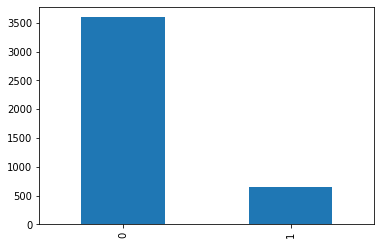

In [5]:
df['TenYearCHD'].value_counts().plot.bar()
plt.show()

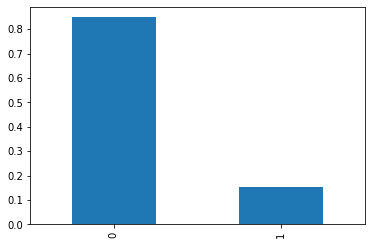

In [6]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()  #normalize used to get proportions
plt.show()

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
ms = df.isnull().sum()
ms[ms>0] #displaying only features with missing values

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

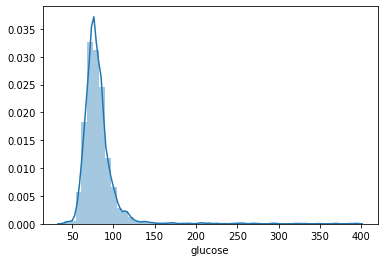

In [9]:
sns.distplot(df['glucose'].dropna())
plt.show()

In [10]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [11]:
#df['glucose'] = df['glucose'].fillna(df['glucose'].median()) #median not affected by outliers

In [12]:
#sns.distplot(df['glucose'])
#plt.show()

In [13]:
#df['glucose'].describe()

Note: 
1. to maintain distribution of all data use forward fill or backward fill instead of median
2. fill and bfill might affect the sorting if any was already there in the data: so shuffle data initially to remove the sortinf present if any.

In [11]:
df = df.fillna(method='ffill')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


##### NOTE: PAIRPLOT VERY IMPORTANT FOR CLASSIFICATION

as it has hue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


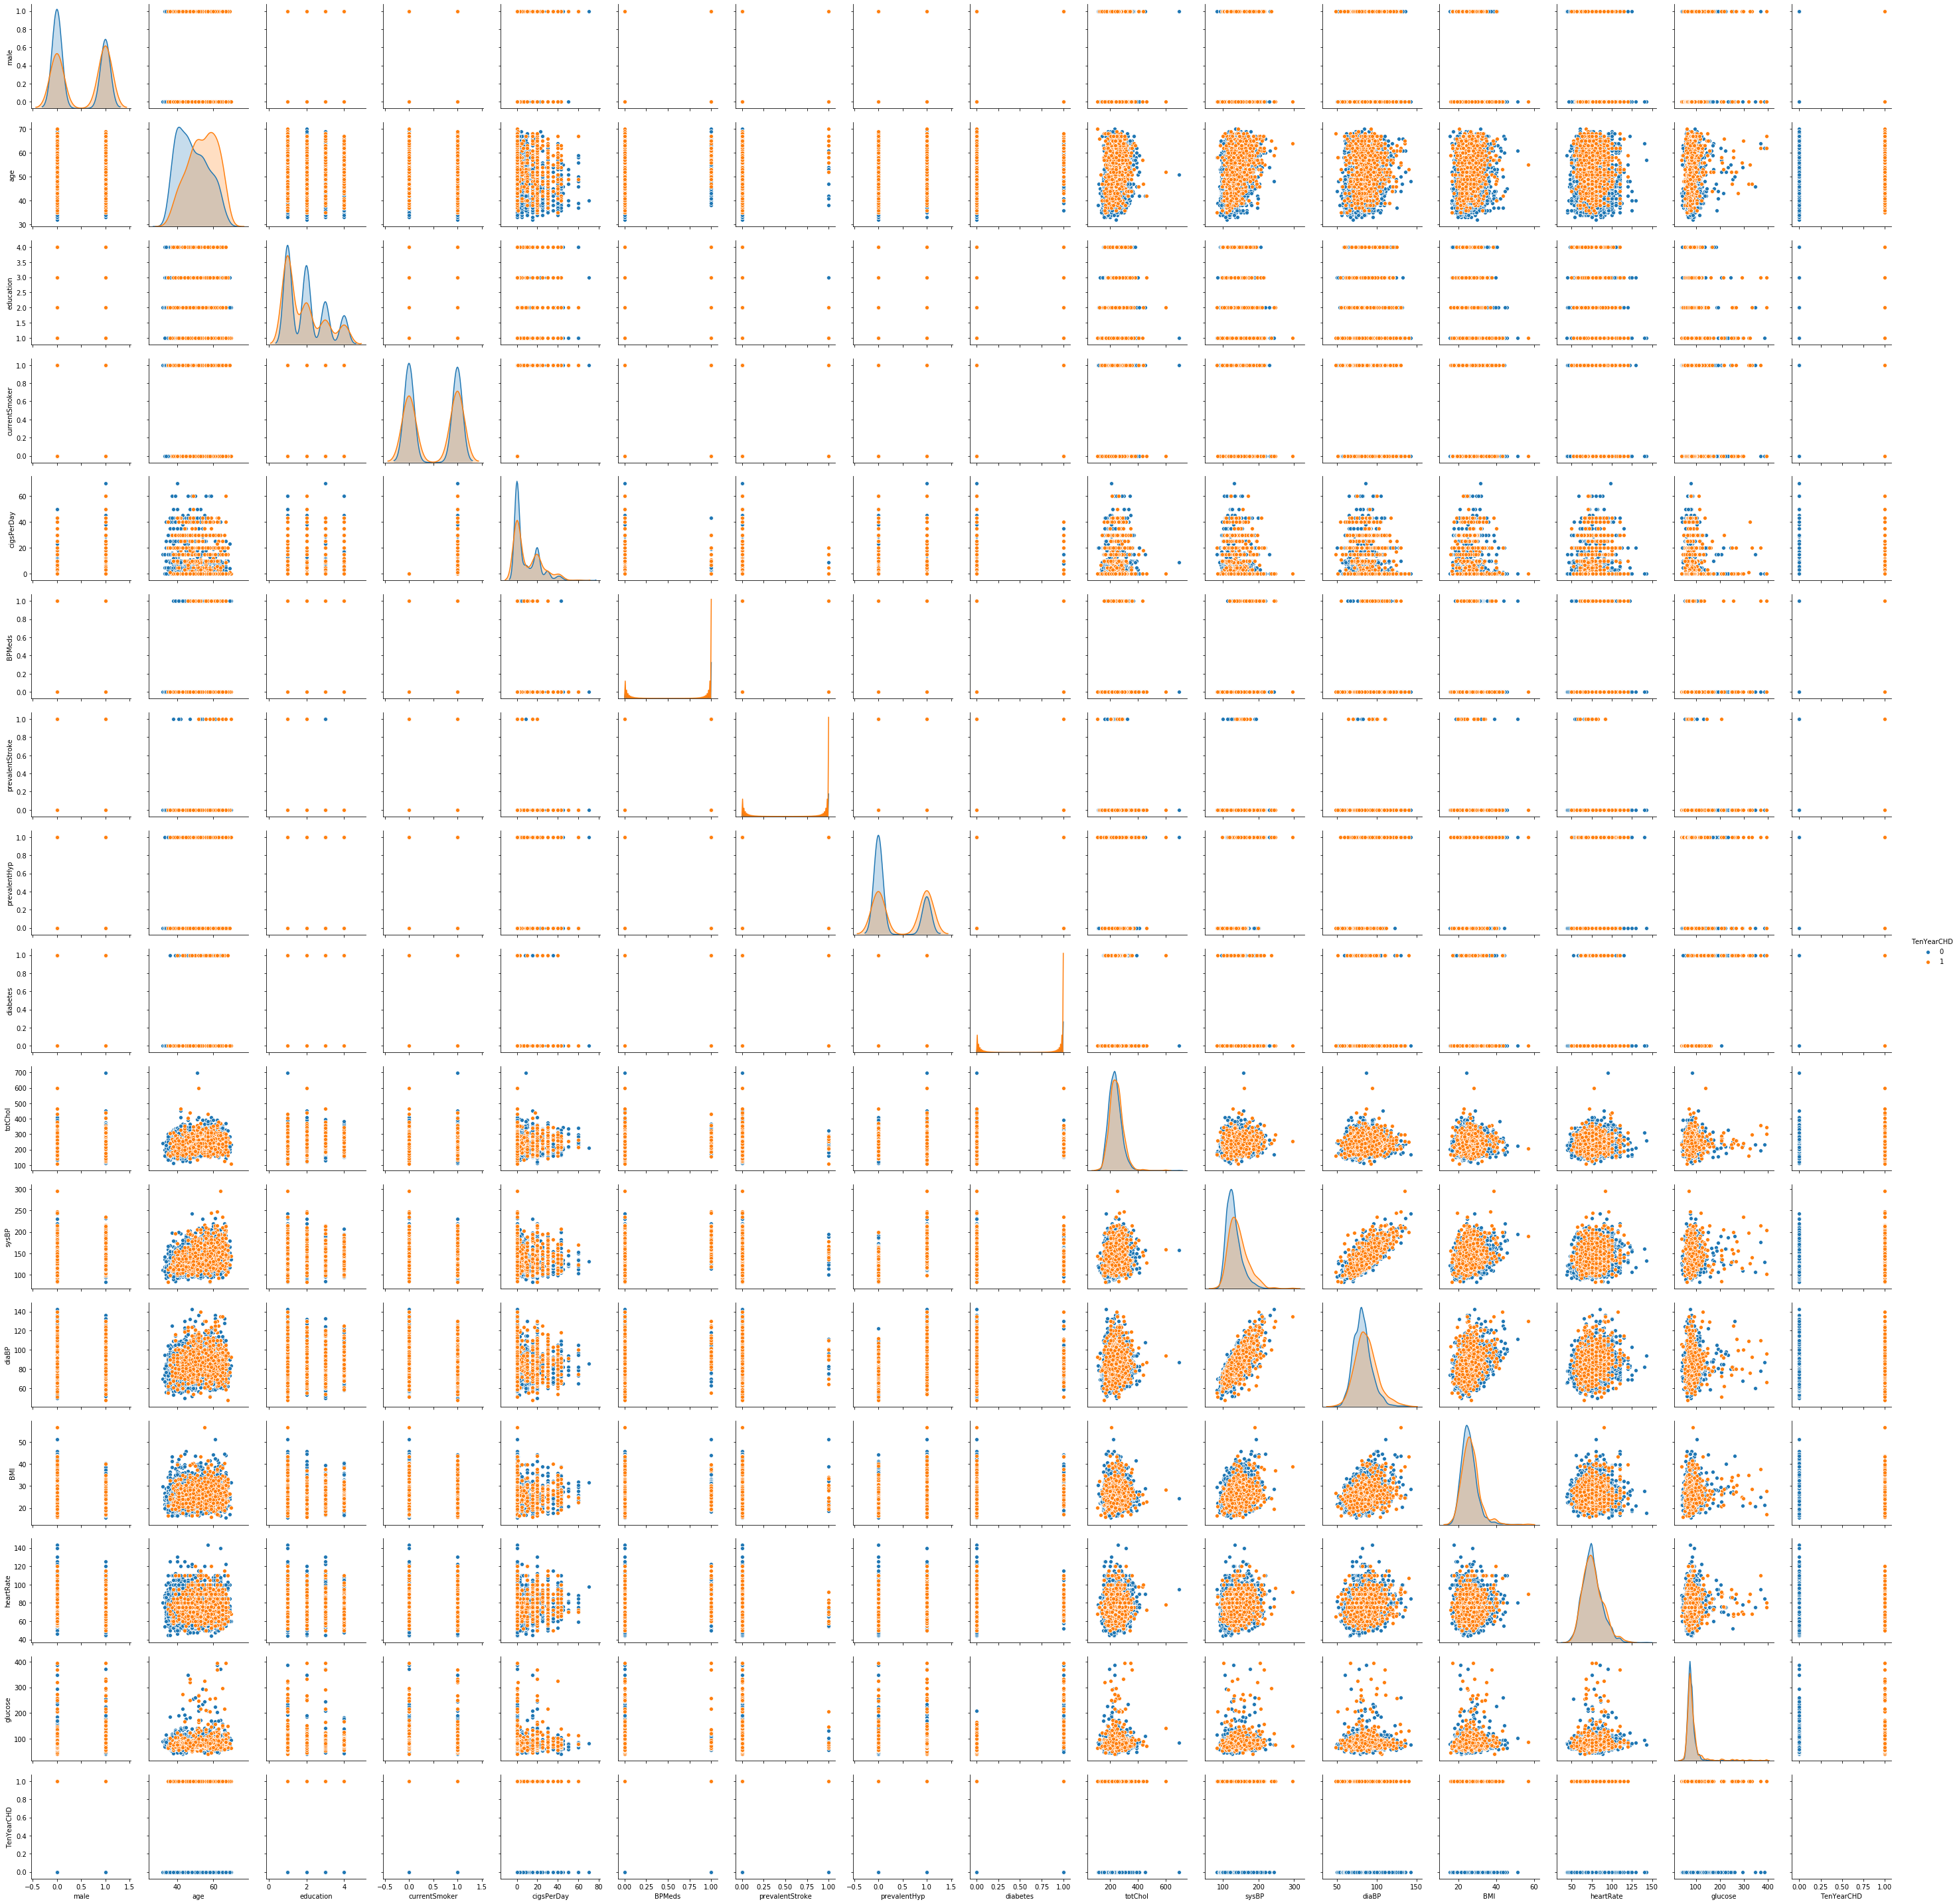

In [13]:
sns.pairplot(df, hue='TenYearCHD')

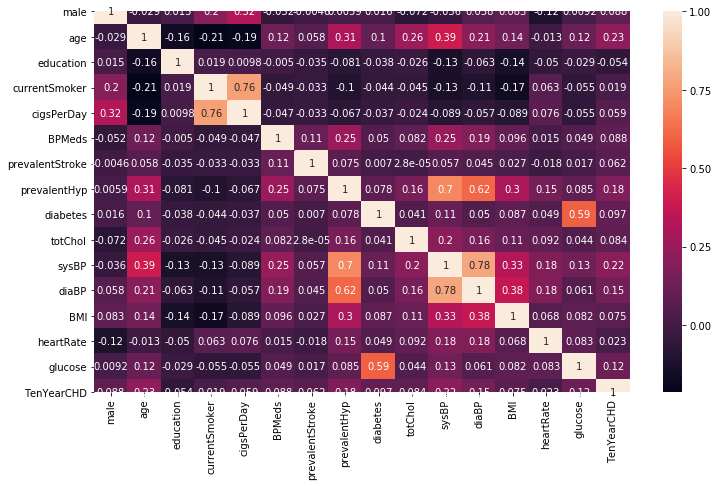

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
import plusmodules as pm

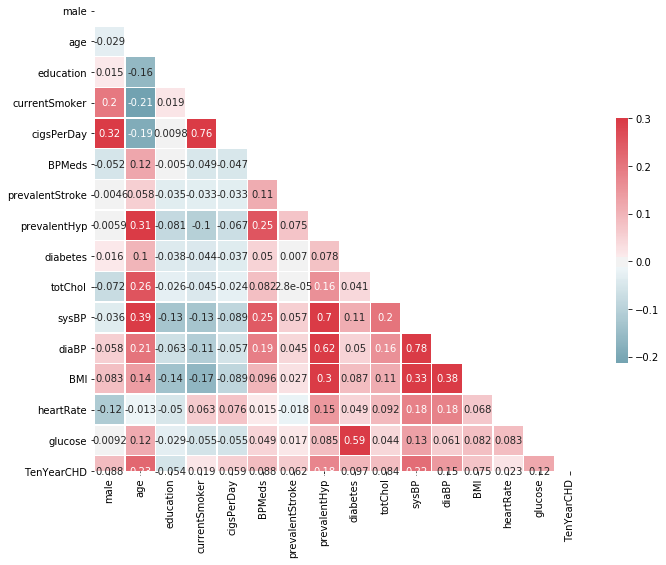

In [16]:
pm.corr_matrix(df)

In [17]:
# here, heat map with categorical dep variable will give an idea of correlation only, not the correct way of interpreting

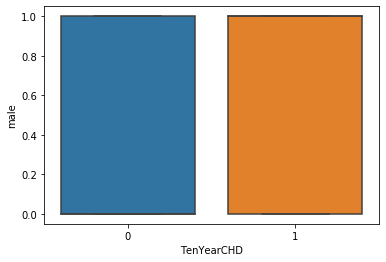

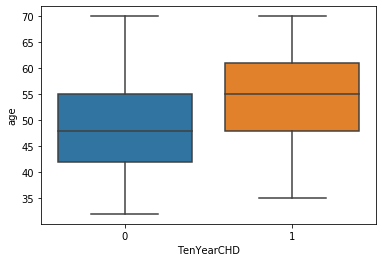

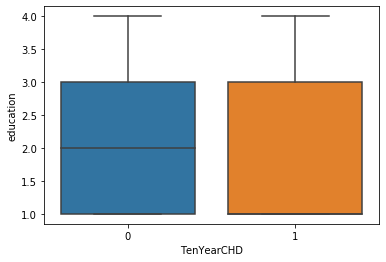

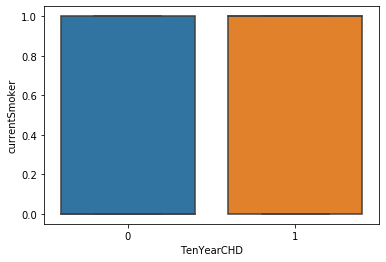

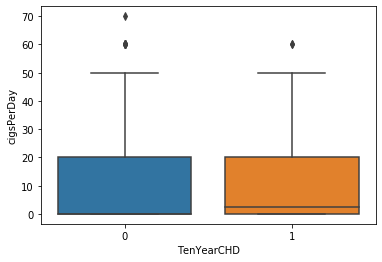

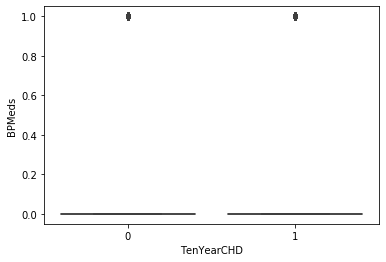

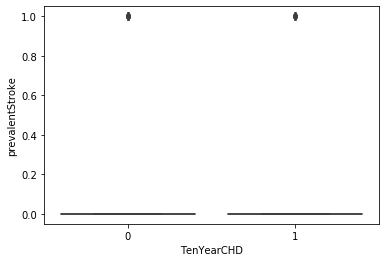

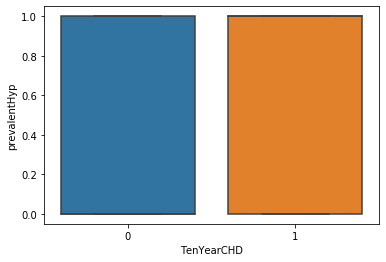

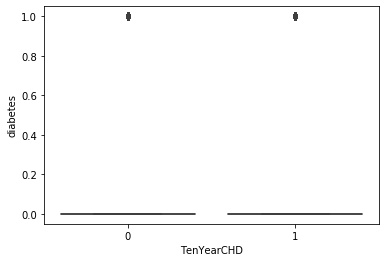

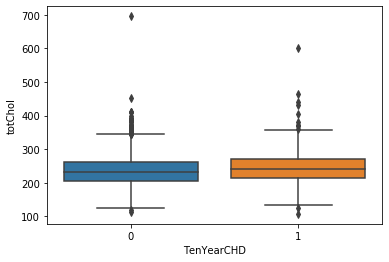

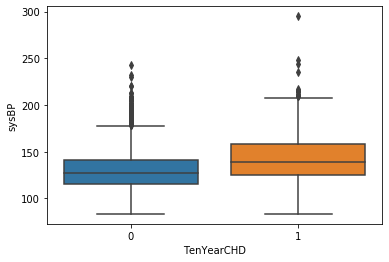

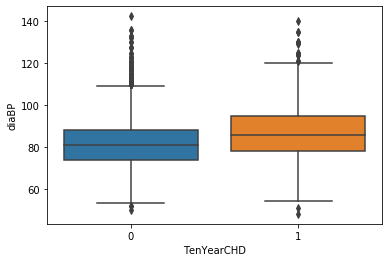

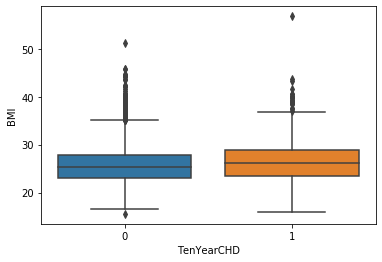

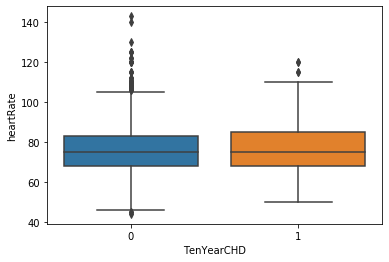

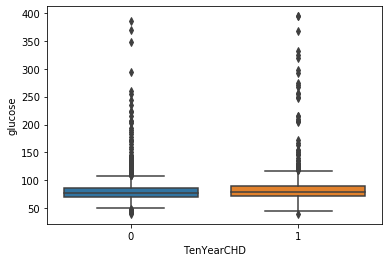

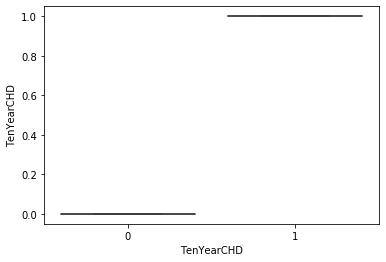

In [19]:
cols = list(df.columns)

for col in cols:
    sns.boxplot(x = df['TenYearCHD'], y = df[col])
    plt.show()  #else everything would go into one plot

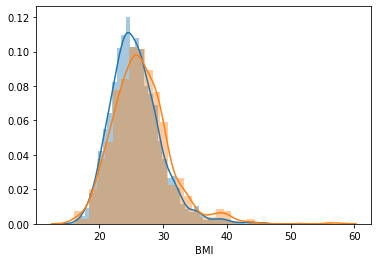

In [20]:
df0 = df[df['TenYearCHD'] == 0]
df1 = df[df['TenYearCHD'] == 1]

sns.distplot(df0['BMI'])
sns.distplot(df1['BMI'])
plt.show()

In [21]:
# useful plot: how bmi of patients little towards higher side

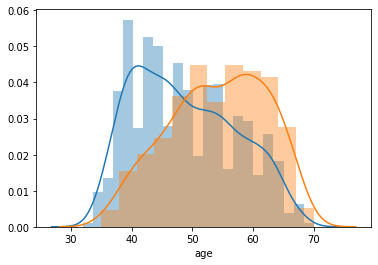

In [22]:
df0 = df[df['TenYearCHD'] == 0]
df1 = df[df['TenYearCHD'] == 1]

sns.distplot(df0['age'])
sns.distplot(df1['age'])
plt.show()

In [23]:
# age is critical factor in influencing heart disease

ASSUMPTION: No multi-collinearity

In [24]:
#correlation is bivariate
#vif is multi-variate hence its preferred so as to find the reltion of a single x with other multiple x's

In [25]:
import statsmodels.api as sm

In [26]:
y=df['TenYearCHD']
X=df.drop('TenYearCHD', axis=1)

Xc = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.DataFrame([vif(Xc.values, i) for i in range(Xc.shape[1])], index=Xc.columns, columns=['VIF'])

,VIF
const,197.703826
male,1.197415
age,1.368623
education,1.052772
currentSmoker,2.490359
cigsPerDay,2.618425
BPMeds,1.097285
prevalentStroke,1.018798
prevalentHyp,2.050602
diabetes,1.551588


##### BUILDING LOGISTIC REGRESSION MODEL

In [28]:
model = sm.Logit(y,Xc, random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.1117
Time:                        20:21:47   Log-Likelihood:                -1604.3
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.189e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1133      0.664    -12.224      0.000      -9.414      -6.812
male                0.5068      0.101      5.043      0.000       0.310       0.704
age                 0.0619      0.006      9.960      0.000       0.050       0.074
education          -0.0168      0.046     -0.368      0.713      -0.106       0.072
currentSmoker       0.0136      0.144      0.094      0.925      -0.268       0.295
cigsPerDay          0.0212      0.006      3.736      0.000       0.010       0.032
BPMeds              0.2668      0.217      1.227      0.220      -0.160       0.693
prevalentStroke     0.9610      0.442      2.175      0.030       0.095       1.827
prevalentHyp        0.2298      0.128      1.789      0.074      -0.022       0.482
diabetes            0.2171      0.290      0.748      0.454      -0.352       0.786
totChol             0.0021      0.001      2.030      0.042    7.15e-05       0.004
sysBP               0.0141      0.004      3.984      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.492      0.623      -0.015       0.009
BMI                 0.0028      0.012      0.239      0.811      -0.020       0.026
heartRate          -0.0015      0.004     -0.397      0.691      -0.009       0.006
glucose             0.0064      0.002      3.077      0.002       0.002       0.011
===================================================================================
"""

In [31]:
#H1: b_age != 0
#H0: b_age = 0 i.e., b_age is having normal distribution with mean=0

#for age: 0.000 is the probability ofgetting |b_age|>= 0.0619 when H) is true

##### BACKWARD ELIMINATION to remove insignificant features iteratively

In [29]:
p = model.pvalues
p

const              2.309987e-34
male               4.583750e-07
age                2.275052e-23
education          7.125524e-01
currentSmoker      9.248067e-01
cigsPerDay         1.870401e-04
BPMeds             2.199894e-01
prevalentStroke    2.963039e-02
prevalentHyp       7.364671e-02
diabetes           4.543832e-01
totChol            4.233827e-02
sysBP              6.785667e-05
diaBP              6.229991e-01
BMI                8.107605e-01
heartRate          6.911357e-01
glucose            2.093535e-03
dtype: float64

In [30]:
cols = list(Xc.columns)

while len(cols)>1: #1 because we expect at least 1 variable to be significant
    X_1 = Xc[cols]
    model = sm.Logit(y,X_1, random_state=3).fit()
    p=model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    
    if max_p>0.05:
        print('\n')
        print('column removed:', feature_maxp, 'probability level:', max_p)
        cols.remove(feature_maxp)
    else:
        break

cols

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


column removed: currentSmoker probability level: 0.9248067145320604
Optimization terminated successfully.
         Current function value: 0.378370
         Iterations 7


column removed: BMI probability level: 0.8183474351558162
Optimization terminated successfully.
         Current function value: 0.378376
         Iterations 7


column removed: heartRate probability level: 0.6936547572101264
Optimization terminated successfully.
         Current function value: 0.378395
         Iterations 7


column removed: education probability level: 0.7021584464005117
Optimization terminated successfully.
         Current function value: 0.378412
         Iterations 7


column removed: diaBP probability level: 0.6177168524266301
Optimization terminated successfully.
         Current function value: 0.378441
         Iterations 7


column removed: diabetes probability level: 0.430019871794435


['const',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'totChol',
 'sysBP',
 'glucose']

In [63]:
model = sm.Logit(y,Xc[cols]).fit()
model.summary()

# LL-Null: Log likelihhod value only for constant
# LLR-pvalue: pvalue for overall model: LL-full/LL-null ditributrd as a chi square distribution and p value will say if the ratio significant or not i.e., if the model overall is good or not
# Log-Likelihood: Log likelihhod value for features

Optimization terminated successfully.
         Current function value: 0.379099
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4232
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.1100
Time:                        21:03:14   Log-Likelihood:                -1607.4
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 8.410e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8484      0.438    -20.220      0.000      -9.706      -7.991
male                0.5096      0.098      5.184      0.000       0.317       0.702
age                 0.0635      0.006     10.632      0.000       0.052       0.075
cigsPerDay          0.0212      0.004      5.510      0.000       0.014       0.029
prevalentStroke     1.0675      0.437      2.443      0.015       0.211       1.924
totChol             0.0021      0.001      2.081      0.037       0.000       0.004
sysBP               0.0167      0.002      8.299      0.000       0.013       0.021
glucose             0.0074      0.002      4.579      0.000       0.004       0.011
===================================================================================
"""

In [64]:
# calculate exponential of coefficient

exp_b = pd.DataFrame({'coefficients': model.params, 'exp_coefficients':np.exp(model.params)}) 
#model.params will give the coeff.
exp_b

,coefficients,exp_coefficients
const,-8.848368,0.000144
male,0.509623,1.664664
age,0.063459,1.065516
cigsPerDay,0.021153,1.021378
prevalentStroke,1.067451,2.907957
totChol,0.002113,1.002115
sysBP,0.016687,1.016827
glucose,0.007373,1.007400


### Age

1. Positive sign (0.0635) of age inidcate that probability of CHD increases with age
2. log(odds) of CHD increase by 0.0635 when age increase by 1 year
3. As age increase by 1 year, odds (CHD) increase by 6% ((e_power_b-1) = (1.065-1))

### Male

1. Positive sign (0.509) of age inidcate that male gender is more prone to CHD compared to female(compare with base)
2. log(odds) of CHD for male is higher by 0.5096 compared to female
3. odds (CHD) for male is 66% higher than female

In [35]:
X_prob = Xc[cols]
X_prob['y'] = y.values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
X_prob.head()

,const,male,age,cigsPerDay,prevalentStroke,totChol,sysBP,glucose,y
3546,1.0,0,54,0.0,0,241.0,106.0,74.0,0
1127,1.0,0,42,10.0,0,253.0,109.0,60.0,0
3088,1.0,0,58,0.0,1,274.0,159.0,81.0,0
437,1.0,1,45,30.0,0,240.0,141.0,76.0,0
3188,1.0,1,63,0.0,0,190.0,148.0,86.0,0


In [37]:
#X_prob.to_csv('X_prob-US_heart_patients.csv')

In [38]:
prob = model.predict(Xc[cols])

In [39]:
type(prob)

pandas.core.series.Series

In [40]:
prob

3546    0.069264
1127    0.040086
3088    0.432654
437     0.193365
3188    0.302438
          ...   
789     0.344482
968     0.120925
1667    0.171440
3321    0.193964
1688    0.038748
Length: 4240, dtype: float64

In [41]:
prob=pd.DataFrame(prob, columns=['prob'])
prob.head()

,prob
3546,0.069264
1127,0.040086
3088,0.432654
437,0.193365
3188,0.302438


In [42]:
prob['y_estimate'] = prob['prob'].apply(lambda x: 1 if x>=0.5 else 0)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y,prob['y_estimate'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [45]:
prob['y'] = y.values

In [46]:
prob.head()

,prob,y_estimate,y
3546,0.069264,0,0
1127,0.040086,0,0
3088,0.432654,0,0
437,0.193365,0,0
3188,0.302438,0,0


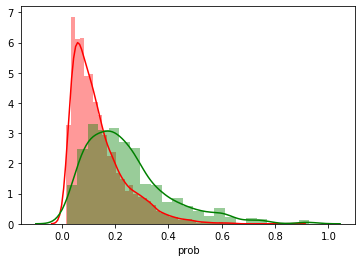

In [47]:
df0 = prob[prob['y'] == 0]
df1 = prob[prob['y'] == 1]

sns.distplot(df0['prob'], color='r')
sns.distplot(df1['prob'], color='g')

#here threshold = 0.5, where the prediction of negatives is correct whereas prediction of ver less positives are done correctly

#### Classification report

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
confusion_matrix(y,prob['y_estimate'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [50]:
accuracy_score(y,prob['y_estimate'])

0.8542452830188679

#### ROC Analysis

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

In [52]:
print('AUC Value of the model:', roc_auc_score(y, prob['prob'])) #here, y_true = y, y_socre = predicted prob

AUC Value of the model: 0.7304199282847056


In [53]:
fpr, tpr, thresholds = roc_curve(y, prob['prob'])

In [54]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78086763e-04,
       2.78086763e-04, 5.56173526e-04, 5.56173526e-04, 8.34260289e-04,
       8.34260289e-04, 1.39043382e-03, 1.39043382e-03, 2.22469410e-03,
       2.22469410e-03, 2.50278087e-03, 2.50278087e-03, 2.78086763e-03,
       2.78086763e-03, 3.33704116e-03, 3.33704116e-03, 3.61512792e-03,
       3.61512792e-03, 3.89321468e-03, 3.89321468e-03, 4.44938821e-03,
       4.44938821e-03, 4.72747497e-03, 4.72747497e-03, 5.00556174e-03,
       5.00556174e-03, 5.28364850e-03, 5.28364850e-03, 6.67408231e-03,
       6.67408231e-03, 7.23025584e-03, 7.23025584e-03, 8.89877642e-03,
       8.89877642e-03, 9.73303671e-03, 9.73303671e-03, 1.02892102e-02,
       1.02892102e-02, 1.16796440e-02, 1.16796440e-02, 1.25139043e-02,
       1.25139043e-02, 1.27919911e-02, 1.27919911e-02, 1.36262514e-02,
       1.36262514e-02, 1.44605117e-02, 1.44605117e-02, 1.47385984e-02,
       1.47385984e-02, 1.50166852e-02, 1.50166852e-02, 1.52947720e-02,
      

In [55]:
tpr

array([0.        , 0.0015528 , 0.00465839, 0.00465839, 0.02173913,
       0.02173913, 0.02329193, 0.02329193, 0.02639752, 0.02639752,
       0.04037267, 0.04037267, 0.04813665, 0.04813665, 0.05279503,
       0.05279503, 0.05434783, 0.05434783, 0.05590062, 0.05590062,
       0.05745342, 0.05745342, 0.05900621, 0.05900621, 0.06055901,
       0.06055901, 0.0636646 , 0.0636646 , 0.07453416, 0.07453416,
       0.07608696, 0.07608696, 0.08229814, 0.08229814, 0.08385093,
       0.08385093, 0.08695652, 0.08695652, 0.0931677 , 0.0931677 ,
       0.0947205 , 0.0947205 , 0.09782609, 0.09782609, 0.10248447,
       0.10248447, 0.10403727, 0.10403727, 0.10559006, 0.10559006,
       0.11024845, 0.11024845, 0.11180124, 0.11180124, 0.11645963,
       0.11645963, 0.11956522, 0.11956522, 0.12111801, 0.12111801,
       0.12267081, 0.12267081, 0.1242236 , 0.1242236 , 0.1257764 ,
       0.1257764 , 0.12732919, 0.12732919, 0.12888199, 0.12888199,
       0.13043478, 0.13043478, 0.13198758, 0.13198758, 0.13354

In [56]:
thresholds

array([1.92865961, 0.92865961, 0.91312889, 0.85807079, 0.64451403,
       0.64416086, 0.64309831, 0.63692876, 0.62076474, 0.61888853,
       0.60102884, 0.59273286, 0.5770012 , 0.57610607, 0.56445639,
       0.56020808, 0.55728264, 0.55126303, 0.54849605, 0.54828537,
       0.54341342, 0.53974452, 0.5349244 , 0.53000139, 0.52883151,
       0.52733388, 0.52427393, 0.52388946, 0.51400158, 0.51330848,
       0.51019049, 0.49846189, 0.49116721, 0.48931525, 0.4872395 ,
       0.47831579, 0.47723031, 0.47321536, 0.46956079, 0.46852073,
       0.46553847, 0.4592962 , 0.458117  , 0.4555332 , 0.45126052,
       0.44956977, 0.44915032, 0.44740178, 0.44606112, 0.4384331 ,
       0.43737703, 0.43691176, 0.43508574, 0.43408986, 0.4330541 ,
       0.43265376, 0.43102807, 0.43008087, 0.43000903, 0.42957085,
       0.42936337, 0.42630178, 0.42528352, 0.42355043, 0.42345092,
       0.4234059 , 0.42331062, 0.42172468, 0.42110502, 0.42061139,
       0.42032199, 0.41772335, 0.41750821, 0.41465187, 0.41385

In [57]:
thresholds[0] = thresholds[0]-1
thresholds

array([0.92865961, 0.92865961, 0.91312889, 0.85807079, 0.64451403,
       0.64416086, 0.64309831, 0.63692876, 0.62076474, 0.61888853,
       0.60102884, 0.59273286, 0.5770012 , 0.57610607, 0.56445639,
       0.56020808, 0.55728264, 0.55126303, 0.54849605, 0.54828537,
       0.54341342, 0.53974452, 0.5349244 , 0.53000139, 0.52883151,
       0.52733388, 0.52427393, 0.52388946, 0.51400158, 0.51330848,
       0.51019049, 0.49846189, 0.49116721, 0.48931525, 0.4872395 ,
       0.47831579, 0.47723031, 0.47321536, 0.46956079, 0.46852073,
       0.46553847, 0.4592962 , 0.458117  , 0.4555332 , 0.45126052,
       0.44956977, 0.44915032, 0.44740178, 0.44606112, 0.4384331 ,
       0.43737703, 0.43691176, 0.43508574, 0.43408986, 0.4330541 ,
       0.43265376, 0.43102807, 0.43008087, 0.43000903, 0.42957085,
       0.42936337, 0.42630178, 0.42528352, 0.42355043, 0.42345092,
       0.4234059 , 0.42331062, 0.42172468, 0.42110502, 0.42061139,
       0.42032199, 0.41772335, 0.41750821, 0.41465187, 0.41385

In [58]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
roc.head(10)

,fpr,tpr,thresholds
0,0.000000,0.000000,0.928660
1,0.000000,0.001553,0.928660
2,0.000000,0.004658,0.913129
3,0.000278,0.004658,0.858071
4,0.000278,0.021739,0.644514
5,0.000556,0.021739,0.644161
6,0.000556,0.023292,0.643098
7,0.000834,0.023292,0.636929
8,0.000834,0.026398,0.620765
9,0.001390,0.026398,0.618889


In [59]:
roc.tail(10)

,fpr,tpr,thresholds
970,0.953003,0.993789,0.031227
971,0.957731,0.993789,0.030518
972,0.957731,0.995342,0.030499
973,0.980812,0.995342,0.024866
974,0.980812,0.996894,0.024665
975,0.998888,0.996894,0.018324
976,0.998888,0.998447,0.018137
977,0.999166,0.998447,0.017470
978,0.999166,1.000000,0.017444
979,1.000000,1.000000,0.016150


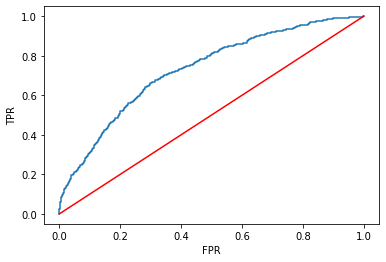

In [60]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r') #to get diagonal
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

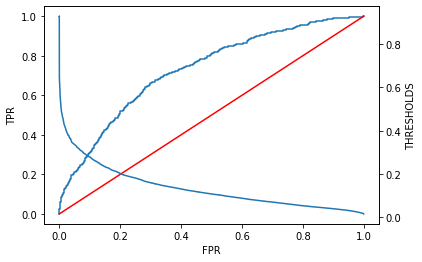

In [61]:
fig, ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.set_ylabel('THRESHOLDS')
ax1.plot(fpr,thresholds)
plt.show()

#from graph: if you want tpr of 80%, then fpr would be approx, 40% and threshold would be approx 1.0 (from RHS y-axis)
#likewise could be used for any interested tpr

In [62]:
roc[(roc['tpr'] >= 0.80) & (roc['tpr'] <= 0.81)]

#go with lowest fpr from below choices

,fpr,tpr,thresholds
738,0.494160,0.801242,0.109596
739,0.496663,0.801242,0.109258
740,0.496663,0.802795,0.109103
741,0.497497,0.802795,0.109003
742,0.497497,0.804348,0.108997
743,0.498331,0.804348,0.108638
744,0.498331,0.805901,0.108583
745,0.498610,0.805901,0.108400
746,0.498610,0.809006,0.108310
747,0.499166,0.809006,0.108284
